<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/hotel_bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/hotel_bookings.csv"
df = pd.read_csv(filename)

1.Analisis y Depuracion de Datos

In [2]:
# A continuacion revisaremos la categoria de cada dato, asi como tambien su integridad (verificacion de nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89367 entries, 0 to 89366
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           89367 non-null  object 
 1   is_canceled                     89367 non-null  int64  
 2   lead_time                       89367 non-null  int64  
 3   arrival_date_year               89367 non-null  int64  
 4   arrival_date_month              89367 non-null  object 
 5   arrival_date_week_number        89367 non-null  int64  
 6   arrival_date_day_of_month       89367 non-null  int64  
 7   stays_in_weekend_nights         89367 non-null  int64  
 8   stays_in_week_nights            89367 non-null  int64  
 9   adults                          89367 non-null  int64  
 10  children                        89363 non-null  float64
 11  babies                          89367 non-null  int64  
 12  meal                            

In [4]:
#A continuacion revisaremos el archivo en excel para validar que elementos conducentes a error puede contener esta base.
df.to_excel("hotelbookings.xlsx", index=False)

In [5]:
#A continuacion analizamos la correlacion entra las variables cuantitativas.

import pandas as pd

corr_df = df.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.336741,0.187073,0.015317,0.000957,-0.032598,-0.022657,0.084859,0.017618,-0.043818,-0.129298,0.094856,-0.082751,-0.165016,-0.281353,-0.004085,0.036185,0.139982,-0.266796,-0.197022
lead_time,0.336741,1.000000,0.066300,0.133490,-0.010852,0.085562,0.166925,0.125487,-0.043609,-0.018929,-0.128015,0.094823,-0.078786,-0.013741,-0.117428,0.145656,0.176231,-0.050028,-0.135283,-0.131032
arrival_date_year,0.187073,0.066300,1.000000,-0.547288,0.001102,0.044839,0.068783,0.033728,0.066248,-0.012396,0.021872,-0.117680,0.039761,0.018075,0.185360,0.257966,-0.039955,0.180067,0.010713,0.068979
arrival_date_week_number,0.015317,0.133490,-0.547288,1.000000,0.059989,0.022913,0.022587,0.025387,-0.000350,0.013248,-0.035432,0.041392,-0.021888,-0.000741,-0.037373,-0.029482,0.022103,0.078641,-0.001949,0.017828
arrival_date_day_of_month,0.000957,-0.010852,0.001102,0.059989,1.000000,-0.017906,-0.027372,0.005534,0.018683,0.001109,-0.005005,-0.030189,-0.000074,0.012240,0.008470,0.064768,0.027057,0.040643,0.010192,0.008842
stays_in_weekend_nights,-0.032598,0.085562,0.044839,0.022913,-0.017906,1.000000,0.560069,0.091326,0.056610,0.021224,-0.093146,-0.016724,-0.046334,0.073322,0.152124,0.078206,-0.059419,0.075174,-0.019308,0.095615
stays_in_week_nights,-0.022657,0.166925,0.068783,0.022587,-0.027372,0.560069,1.000000,0.089944,0.056712,0.023515,-0.101290,-0.020556,-0.052461,0.106775,0.181760,0.191908,-0.007912,0.095970,-0.027407,0.101336
adults,0.084859,0.125487,0.033728,0.025387,0.005534,0.091326,0.089944,1.000000,0.041971,0.018326,-0.140929,-0.004580,-0.111050,-0.030624,-0.009174,0.228333,-0.004695,0.205179,0.011032,0.096643
children,0.017618,-0.043609,0.066248,-0.000350,0.018683,0.056610,0.056712,0.041971,1.000000,0.024914,-0.034832,-0.027329,-0.021725,0.053794,0.072160,0.048698,-0.036302,0.320383,0.052765,0.079536
babies,-0.043818,-0.018929,-0.012396,0.013248,0.001109,0.021224,0.023515,0.018326,0.024914,1.000000,-0.009953,-0.008646,-0.007102,0.083949,0.040704,0.031208,-0.011775,0.030876,0.038461,0.113367


In [7]:
# En base a ciertas premisas y con el objeto de mantener cierta integridad en la informacion, eliminaremos las siguientes columnas y filas, respectivamente:
#Company --> Igual caso que agent, es una columna que posee mucha informacion en blanco y no permite identicarla correctamente.
#Adicionalmente limpiaremos todos los datos con elementos nulos

df2=df
df2 = df2.drop(columns=['company'])
df2 = df2.dropna(subset=["children"])
df2 = df2.dropna(subset=["country"])
df2 = df2.dropna(subset=["agent"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75833 entries, 3 to 89365
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75833 non-null  object 
 1   is_canceled                     75833 non-null  int64  
 2   lead_time                       75833 non-null  int64  
 3   arrival_date_year               75833 non-null  int64  
 4   arrival_date_month              75833 non-null  object 
 5   arrival_date_week_number        75833 non-null  int64  
 6   arrival_date_day_of_month       75833 non-null  int64  
 7   stays_in_weekend_nights         75833 non-null  int64  
 8   stays_in_week_nights            75833 non-null  int64  
 9   adults                          75833 non-null  int64  
 10  children                        75833 non-null  float64
 11  babies                          75833 non-null  int64  
 12  meal                            

In [9]:
df2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,75833.000000,75833.000000,75833.000000,75833.000000,75833.000000,75833.000000,75833.000000,75833.000000,75833.00000,75833.000000,75833.000000,75833.000000,75833.000000,75833.000000,75833.000000,75833.000000,75833.000000,75833.000000,75833.000000
mean,0.529519,115.936452,2016.027943,27.281197,15.707014,1.020743,2.718500,1.895692,0.10800,0.008295,0.016708,0.104625,0.029605,0.181491,106.074572,3.264515,100.435562,0.058682,0.503857
std,0.499131,110.828420,0.723968,13.549914,8.791623,1.046437,2.037941,0.480648,0.40939,0.102697,0.128175,0.881390,0.489236,0.597353,116.945764,21.061594,52.575410,0.236149,0.751981
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,28.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,65.000000,0.000000,0.000000
50%,1.000000,82.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,90.000000,0.000000,0.000000
75%,1.000000,176.000000,2017.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,122.750000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,26.000000,10.00000,10.000000,1.000000,26.000000,50.000000,17.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


1.Creacion y Optimizacion de Modelo Predictivo (KNN)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Preparamos el dataset

In [11]:
# Las variables objeto de prediccion fueron elegidas en funcion de su correlacion con la variable a predecir.
X = df2[['lead_time','arrival_date_year','is_repeated_guest','booking_changes','agent','adr','required_car_parking_spaces','total_of_special_requests']].values
y = df2['is_canceled'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creamos el Modelo

In [24]:
#Realizamos iteraciones para "N° de vecinos" y nos quedamos con el mejor equilibrio para el nivel de precision de test y entrenamiento.

n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.84


Resultados obtenidos

In [25]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 8907  1732]
 [ 1994 10117]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     10639
           1       0.85      0.84      0.84     12111

    accuracy                           0.84     22750
   macro avg       0.84      0.84      0.84     22750
weighted avg       0.84      0.84      0.84     22750



Arbol de Decision

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

[[0.05617978 0.94382022]
 [0.20995452 0.79004548]
 [0.18079096 0.81920904]
 ...
 [0.19620253 0.80379747]
 [1.         0.        ]
 [0.11911357 0.88088643]]
Esta instancia pertenece a la clase [1 1 1 ... 1 0 1]


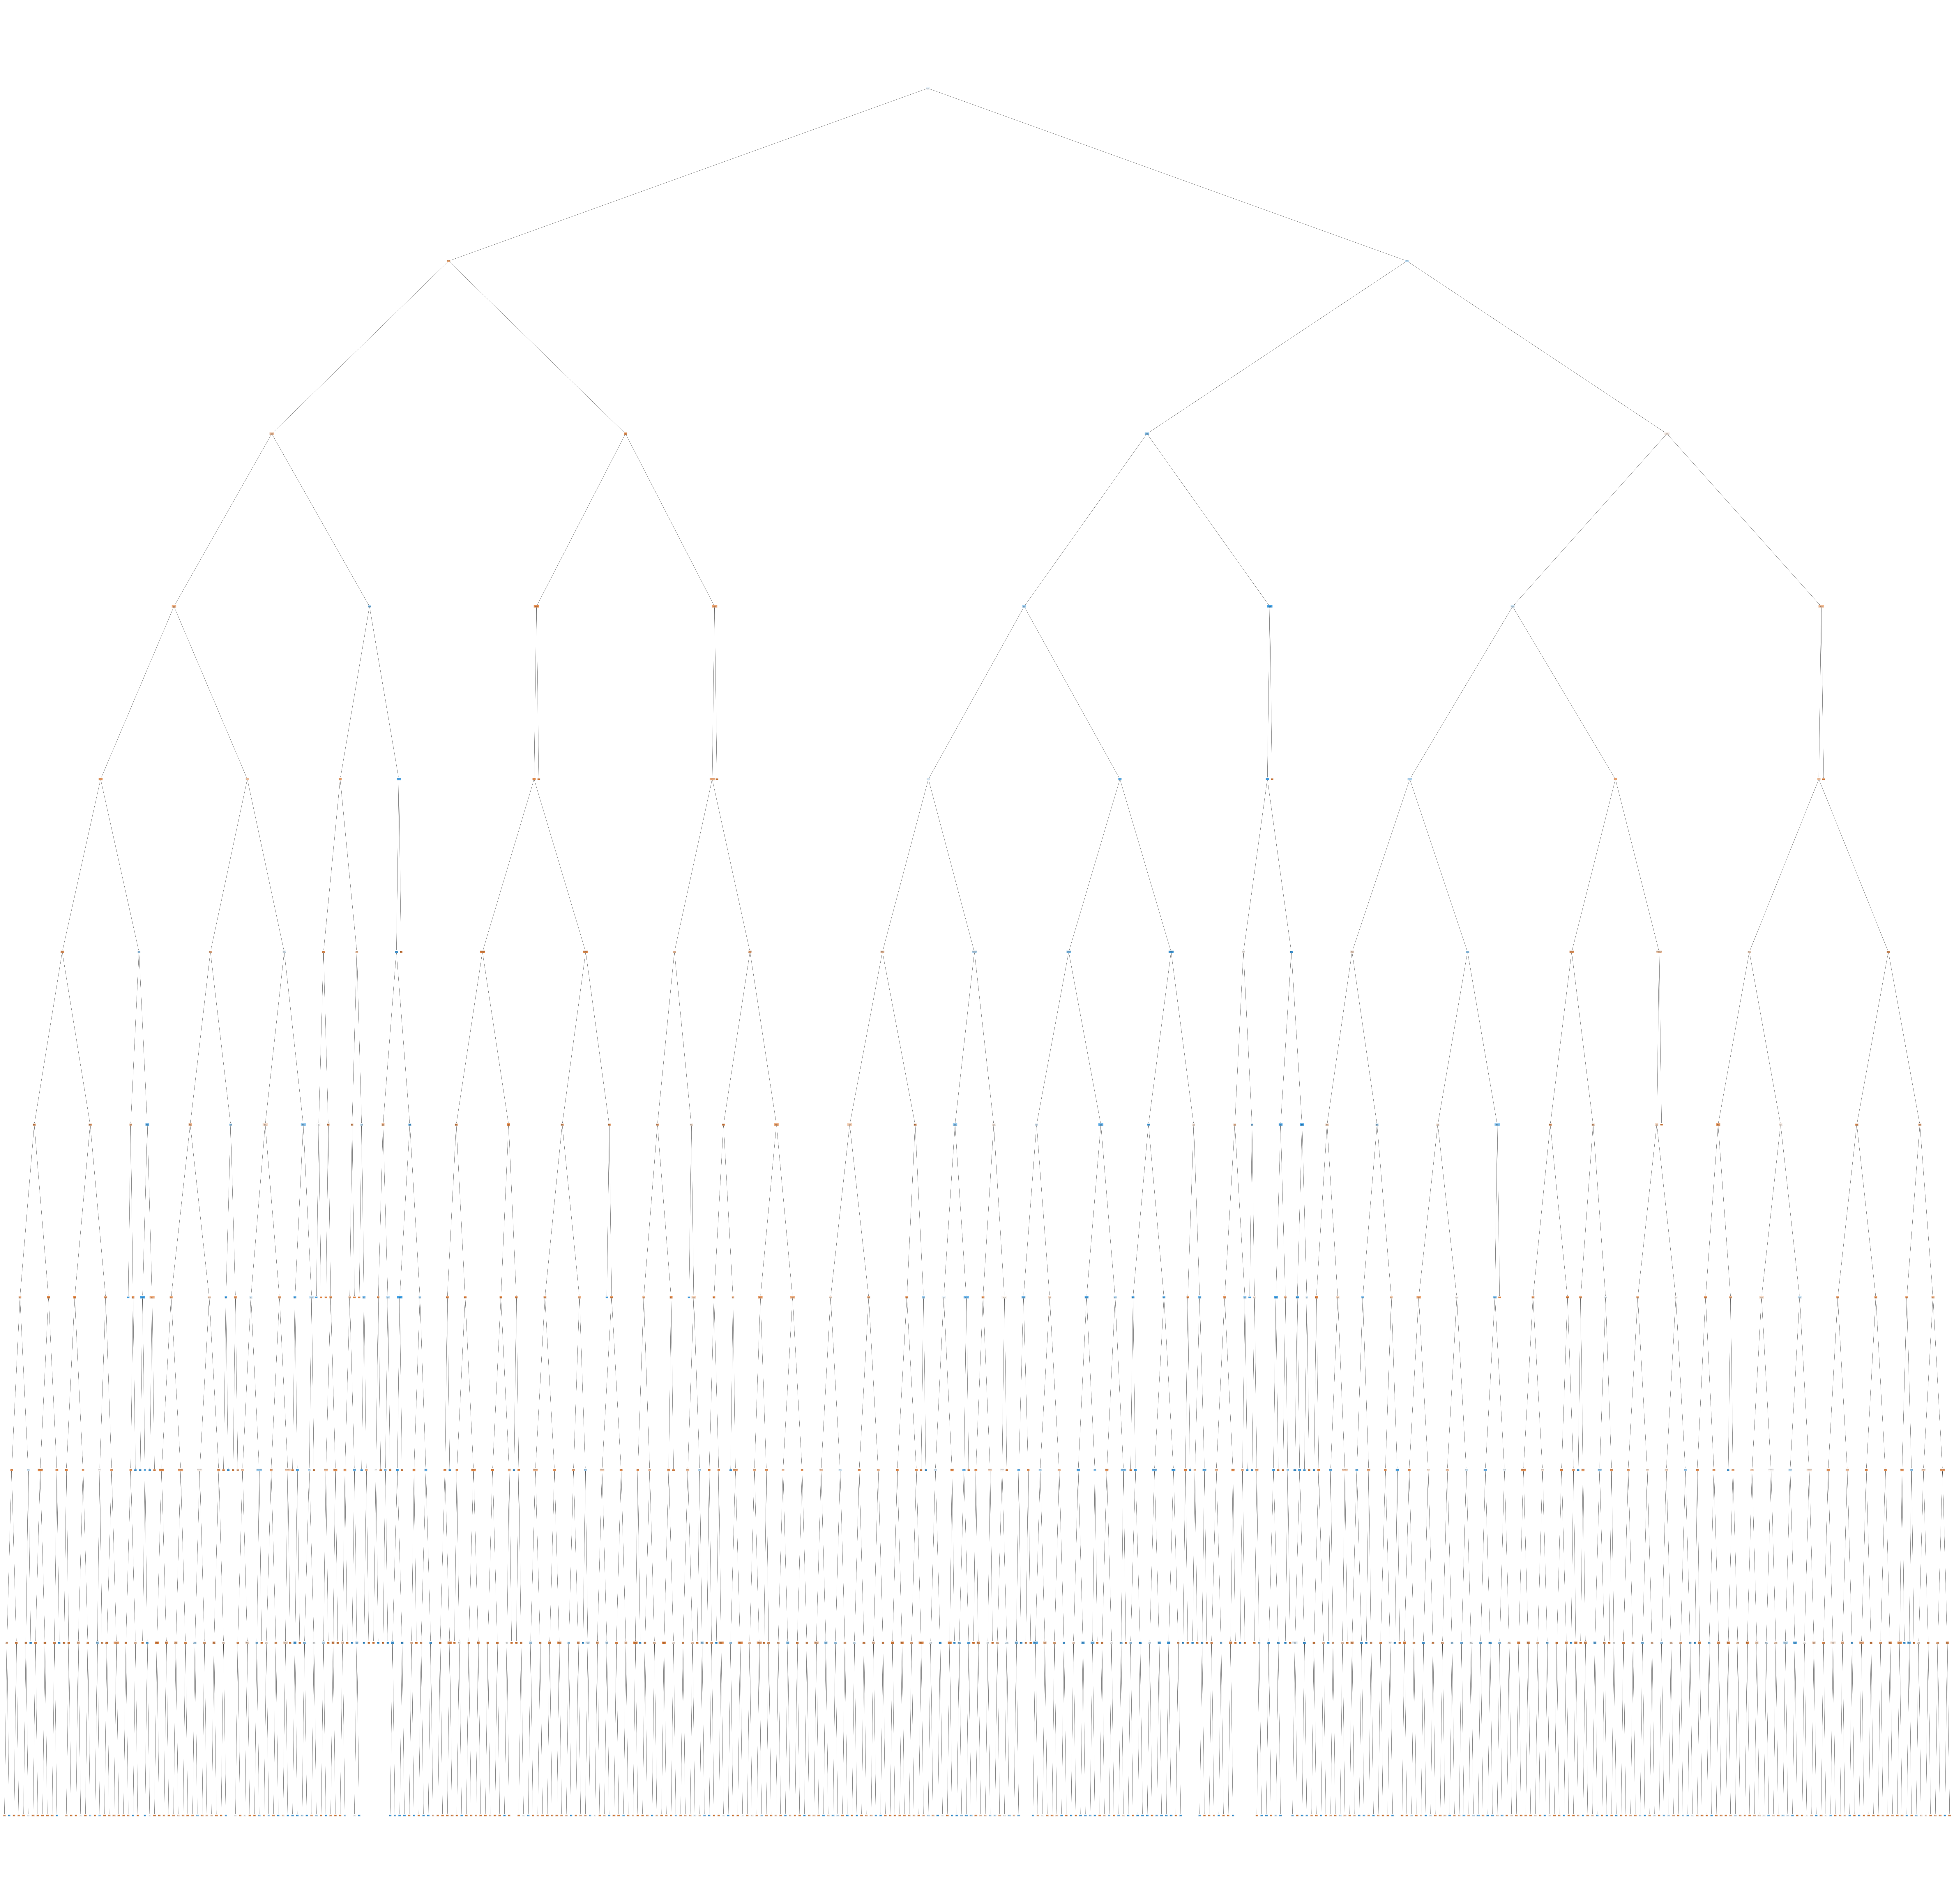

In [39]:
X=df2[['lead_time','arrival_date_year','is_repeated_guest','booking_changes','agent','adr','required_car_parking_spaces','total_of_special_requests']].values
y=df2['is_canceled'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)

tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_train, y_train)
# Visualizando árbol de decisión
plt.figure(figsize=(120,120))
tree.plot_tree(
    tree_clf,
    feature_names=['lead_time','arrival_date_year','is_repeated_guest','booking_changes','agent','adr','required_car_parking_spaces','total_of_special_requests'],
    class_names=['0','1'],
    rounded=True,
    filled=True
)
# Nueva instancia
# CALCULAMOS LAS Probabilidades por cada clase
print(tree_clf.predict_proba(X_test))
# Clase predicha
pred=tree_clf.predict(X_test)
print("Esta instancia pertenece a la clase",tree_clf.predict(X_test))

In [40]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[8504 2135]
 [2243 9868]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     10639
           1       0.82      0.81      0.82     12111

    accuracy                           0.81     22750
   macro avg       0.81      0.81      0.81     22750
weighted avg       0.81      0.81      0.81     22750



Random Forests

In [34]:

from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier(n_estimators=195)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)

pred = rndf_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

rndf_clf.score(X_test, y_test)

[[ 9333  1306]
 [ 1625 10486]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     10639
           1       0.89      0.87      0.88     12111

    accuracy                           0.87     22750
   macro avg       0.87      0.87      0.87     22750
weighted avg       0.87      0.87      0.87     22750



0.8711648351648351